In [24]:
# imports
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
from pyrt.data.data_trots import *
from pyrt.optimization import *
from pyrt.tools import print_structure_info

In [2]:
def print_structure_info(data):
    for s in data.structures:
        print s.name,s.rx, s.num_vox, s.num_beamlets, s.is_target, s.Dij.shape
        print '-'*20

In [25]:
# Josh Inputs
# Find work directory
path1 = '/Users/jtmargo/Desktop/Josh/Clemson University/Research/Treatment Plan/TROTS Data/Prostate_VMAT/'
path2 = '/Users/jtmargo/Desktop/Josh/Clemson University/Research/Treatment Plan/TROTS Data/Head-and-Neck/'


#Set cwd
cwd = path1

# Load patient information

if cwd == path1:
    filename = 'Prostate_VMAT_208.mat'
    input_dict = {
        'cwd': cwd,
        'filename': filename,
        'Rx': {'PTV': 79.56, 'PTV Vesicles': 72.2},
    }

if cwd == path2:
    filename = 'Head-and-Neck_01.mat'
    input_dict = {
        'cwd': cwd,
        'filename': filename,
        'Rx': {'PTV 0-46 Gy': 47.15},
    }

In [26]:
data = patient_data(input_dict)

[ 119.  120.  120.  119.  113.  103.   98.  110.  124.  134.  138.  142.
  142.  141.  137.  129.  116.  103.  112.  119.  124.  124.  123.]
[    0.   119.   239.   359.   478.   591.   694.   792.   902.  1026.
  1160.  1298.  1440.  1582.  1723.  1860.  1989.  2105.  2208.  2320.
  2439.  2563.  2687.  2810.]
importing PTV Dij as dense matrix, converting to sparse...
importing PTV low Maximum Dij as dense matrix, converting to sparse...
importing PTV Shell 50 mm Dij as dense matrix, converting to sparse...
importing External Ring 20 mm Dij as sparse matrix
importing PTV Vesicles Dij as dense matrix, converting to sparse...
importing PTV Shell 5 mm Dij as dense matrix, converting to sparse...
importing PTV Shell 15 mm Dij as dense matrix, converting to sparse...
importing PTV Shell 25 mm Dij as dense matrix, converting to sparse...
importing Rectum Dij as dense matrix, converting to sparse...
importing Anus Dij as dense matrix, converting to sparse...
importing Hip (L) Dij as dense ma

In [ ]:
for filename in os.listdir(cwd):
    print filename
    input_dict = {
    'cwd': cwd,
    'filename': filename,
    'Rx': {'PTV': 79.56, 'PTV Vesicles': 72.2},
    }
    data = patient_data(input_dict)
    print_structure_info(data)
    print '-'*40

In [6]:
print data.f['patient/Beams'].keys()

[u'BeamConfig', u'ElementIndex', u'Num', u'Resolution']


In [27]:
f = data.f
b = f['patient/Beams/BeamConfig']
field = np.asarray(f[b['Field'][0][0]])
print field[20][40]

82


(40, 80)
(40, 80)
(40, 80)
(40, 80)
(40, 80)
(40, 80)
(40, 80)
(40, 80)
(40, 80)
(40, 80)
(40, 80)
(40, 80)
(40, 80)
(40, 80)
(40, 80)
(40, 80)
(40, 80)
(40, 80)
(40, 80)
(40, 80)
(40, 80)


/Users/jtmargo/anaconda2/lib/python2.7/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


(40, 80)
(40, 80)


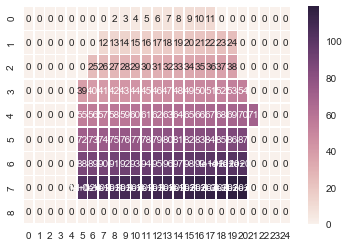

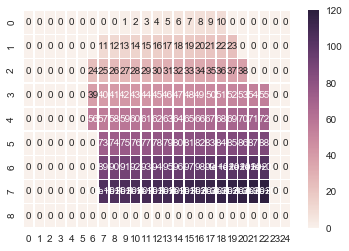

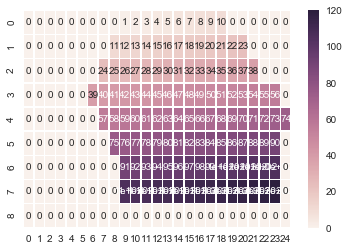

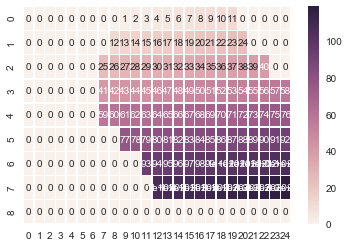

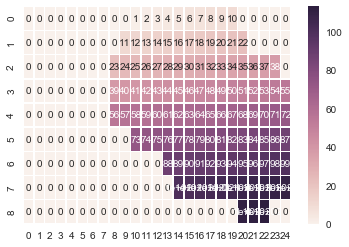

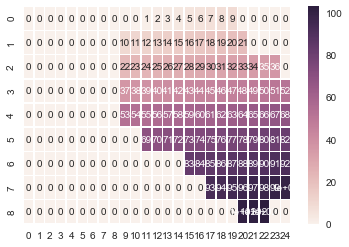

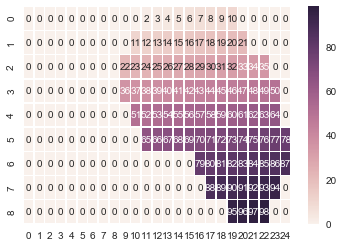

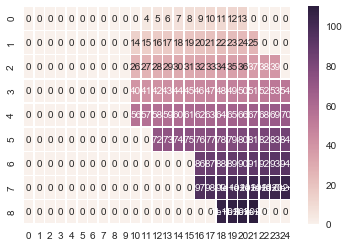

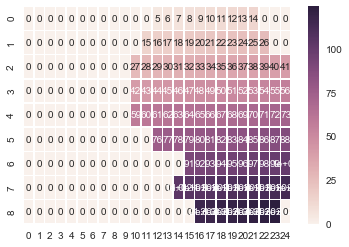

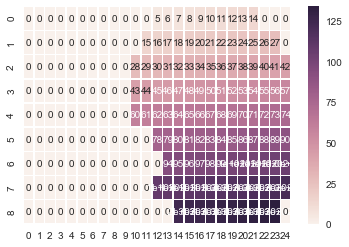

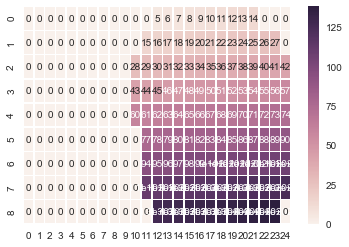

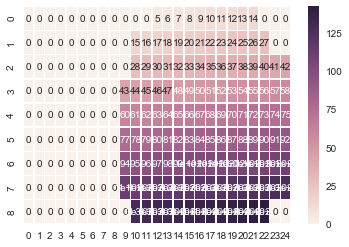

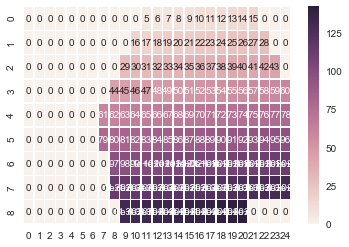

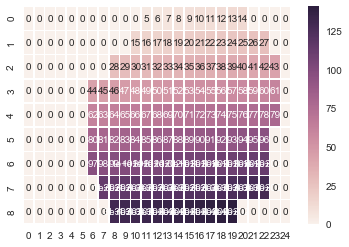

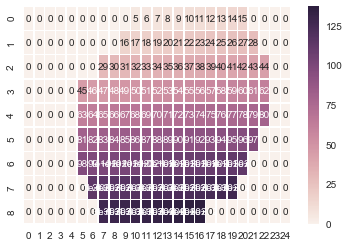

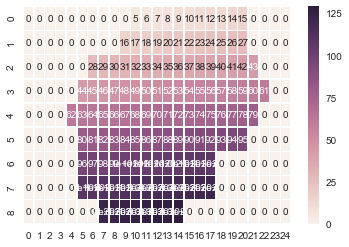

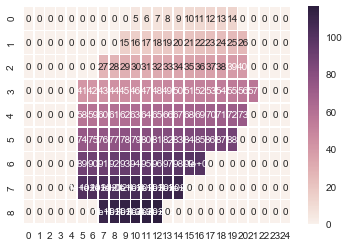

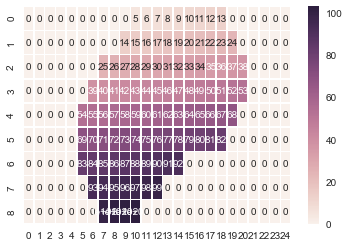

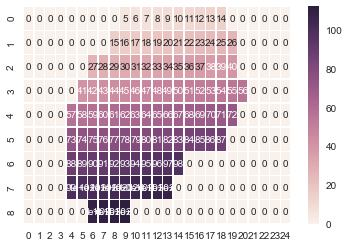

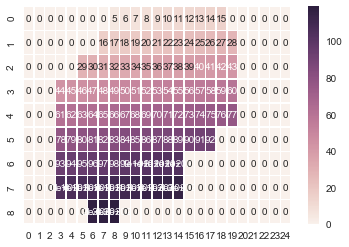

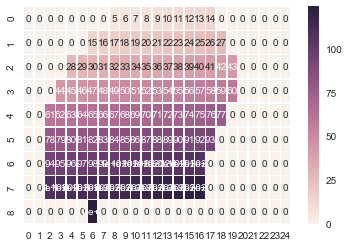

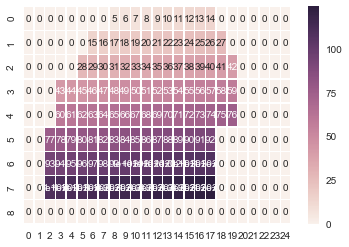

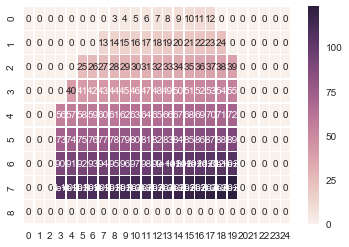

In [28]:


# Draw a heatmap with the numeric values in each cell
for i in range(b['Field'].size):
#     print np.asarray(f[b['Field'][i][0]]).shape
    plt.figure()
    sns.heatmap(np.asarray(f[b['Field'][i][0]])[15:24,25:50], annot=True, linewidths=.5)


In [ ]:
np.asarray(f[b['Field'][1][0]]).shape[0]

In [ ]:
field = np.asarray(f[b['Field'][1][0]])
print field
print np.where(field==1)
print int(np.where(field==1)[0])
print field[17][37]

print np.asarray(data.f['patient/Beams/ElementIndex'][0][0])

In [ ]:
#Find min and max row positions of field for all control points
min_row = np.asarray(f[b['Field'][0][0]]).shape[1]
max_row = 0
for cp in range(data.num_control_points):
    field = np.asarray(f[b['Field'][cp][0]])
    min_cp = int(np.where(field==1)[0])
    max_cp = int(np.where(field==np.asarray(data.f['patient/Beams/ElementIndex'][0][cp]))[0])
    if min_cp < min_row:
        min_row = min_cp
    if max_cp > max_row:
        max_row = max_cp
        
    #return min_row, max_row+1
max_row += 1      
print 'Min row = {}'.format(min_row)
print 'Max row = {}'.format(max_row)
    

In [ ]:
#Find leaf positions for each control point field
cp = 0
field = np.asarray(f[b['Field'][cp][0]])
left_leaf = [int(np.where(field==1)[0])]
left_leaf_index = [1]
print int(np.where(field==1)[1])

print np.where(field[16][:]>0)[0][0]

# print left_leaf
# print left_leaf_index

# print field[16][:]
# print np.argmax(field[16][:])

# print int(np.where(field==1)[1])
# print field[16][37]
# print int(np.where(field==np.argmax(field[16][:]))[1])
# print np.argmax(field[16][:])
# print field[16][43]

# print int(np.where(field==np.argmax(field[16][:]))[1]) - int(np.where(field==1)[0])

num_beamlets_in_row = [int(np.argmax(field[16][:])) - int(np.where(field==1)[1])+1]
print num_beamlets_in_row 

# for row in range(min,max):
#     left_leaf.append(int(np.where(field==1)[1]))
#     left_leaf_index.append(int(np.where(field==1)[1]))

In [ ]:
cp = 0
field = np.asarray(f[b['Field'][cp][0]])
left_leaf = []
left_leaf_index = []
num_beamlets_in_row = []
row_array = range(min_row,max_row)
# row = 16
for row in row_array:
    left_leaf.append(int(np.where(field[row][:]>0)[0][0]))
    left_leaf_index.append(field[row][np.where(field[row][:]>0)[0][0]])
    num_beamlets_in_row.append(int(np.argmax(field[row][:])) - int(np.where(field[row][:]>0)[0][0])+1)
    
    
    
print left_leaf
print left_leaf_index
print np.array(num_beamlets_in_row).sum()

for r in range(len(left_leaf)):
    print field[row_array[r]][left_leaf[r]:left_leaf[r]+num_beamlets_in_row[r]]
    

In [15]:
cp = 0
field = np.asarray(data.f[b['Field'][cp][0]])
num_beamlets = np.asarray(data.f['patient/Beams/ElementIndex'][0][cp])
test = control_point(cp, field, 16, 23, 0, num_beamlets)


NameError: global name 'f' is not defined